# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

counter = 1
set_number = 1

url = "http://api.openweathermap.org/data/2.5/weather?units=imperial"

print("Beginning Data Retrieval")
print("-----------------------------")
        
# Build query URL
for city in cities:
    query_url = url + "&appid=" + api_key + "&q=" + city
    #print(query_url)
    try:
        weather = requests.get(query_url)
        weather_json = weather.json()
        #print(weather_json)
    
        city_name.append(weather_json['name'])
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
    
    except(KeyError):
        print("City not found. Skipping...")
    
    if counter <= 50:
        print(f"Processing Record {counter} of set {set_number} | {city}")
            
    else:
        counter = 1
        set_number += 1
        print(f"Processing Record {counter} of set {set_number} | {city}")
            
    counter += 1
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | cabo san lucas
Processing Record 2 of set 1 | rikitea
Processing Record 3 of set 1 | ayacucho
Processing Record 4 of set 1 | aktau
City not found. Skipping...
Processing Record 5 of set 1 | attawapiskat
Processing Record 6 of set 1 | faanui
City not found. Skipping...
Processing Record 7 of set 1 | taolanaro
Processing Record 8 of set 1 | pevek
Processing Record 9 of set 1 | hobart
City not found. Skipping...
Processing Record 10 of set 1 | illoqqortoormiut
Processing Record 11 of set 1 | muros
City not found. Skipping...
Processing Record 12 of set 1 | belushya guba
Processing Record 13 of set 1 | abbeville
Processing Record 14 of set 1 | busselton
Processing Record 15 of set 1 | kruisfontein
Processing Record 16 of set 1 | yellowknife
Processing Record 17 of set 1 | lavrentiya
Processing Record 18 of set 1 | bluff
Processing Record 19 of set 1 | punta arenas
Processing Record 20 of set 1 | jamestown

Processing Record 37 of set 4 | airai
Processing Record 38 of set 4 | teguise
Processing Record 39 of set 4 | samarai
Processing Record 40 of set 4 | kronach
Processing Record 41 of set 4 | timmins
Processing Record 42 of set 4 | moerai
Processing Record 43 of set 4 | tiksi
Processing Record 44 of set 4 | broome
Processing Record 45 of set 4 | mopipi
Processing Record 46 of set 4 | tynda
Processing Record 47 of set 4 | kyabe
City not found. Skipping...
Processing Record 48 of set 4 | juchitan
Processing Record 49 of set 4 | salima
Processing Record 50 of set 4 | myaundzha
Processing Record 1 of set 5 | poddorye
Processing Record 2 of set 5 | kazachinskoye
Processing Record 3 of set 5 | auch
City not found. Skipping...
Processing Record 4 of set 5 | barentsburg
Processing Record 5 of set 5 | blenheim
Processing Record 6 of set 5 | kysyl-syr
Processing Record 7 of set 5 | yumen
Processing Record 8 of set 5 | kohlu
Processing Record 9 of set 5 | praia da vitoria
Processing Record 10 of se

Processing Record 23 of set 8 | saskylakh
Processing Record 24 of set 8 | vao
Processing Record 25 of set 8 | atambua
Processing Record 26 of set 8 | shimoda
Processing Record 27 of set 8 | teluknaga
Processing Record 28 of set 8 | shobara
Processing Record 29 of set 8 | pitimbu
Processing Record 30 of set 8 | dwarka
Processing Record 31 of set 8 | dunmore town
Processing Record 32 of set 8 | rio grande
Processing Record 33 of set 8 | port blair
Processing Record 34 of set 8 | codrington
Processing Record 35 of set 8 | broken hill
Processing Record 36 of set 8 | yukon
Processing Record 37 of set 8 | ankang
Processing Record 38 of set 8 | lundazi
Processing Record 39 of set 8 | tsabong
Processing Record 40 of set 8 | oussouye
Processing Record 41 of set 8 | sola
Processing Record 42 of set 8 | bridgwater
Processing Record 43 of set 8 | udachnyy
Processing Record 44 of set 8 | santiago del estero
Processing Record 45 of set 8 | sechura
Processing Record 46 of set 8 | itarema
Processing R

Processing Record 7 of set 12 | lingao
City not found. Skipping...
Processing Record 8 of set 12 | old road
Processing Record 9 of set 12 | north bend
Processing Record 10 of set 12 | mayo
Processing Record 11 of set 12 | natal
Processing Record 12 of set 12 | chapais
Processing Record 13 of set 12 | pangnirtung
Processing Record 14 of set 12 | puerto colombia
Processing Record 15 of set 12 | kem
Processing Record 16 of set 12 | capinota
Processing Record 17 of set 12 | kindu
Processing Record 18 of set 12 | lugovoy
Processing Record 19 of set 12 | nileshwar
Processing Record 20 of set 12 | vila velha
Processing Record 21 of set 12 | sambava
Processing Record 22 of set 12 | eston
Processing Record 23 of set 12 | bonavista
Processing Record 24 of set 12 | imaculada
Processing Record 25 of set 12 | palu
Processing Record 26 of set 12 | vavatenina
Processing Record 27 of set 12 | vaitape
City not found. Skipping...
Processing Record 28 of set 12 | katsiveli
Processing Record 29 of set 12 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
columns_check = {"City": len(city_name), "Cloudiness": len(cloudiness), "Country": len(country),
                 "Date": len(date), "Humidity": len(humidity), "Lat": len(lat), "Lng": len(lng),
                 "Max Temp": len(max_temp), "Max Windspeed": len(wind_speed)
}

# Convert columns into a series
len_check = pd.Series(columns_check)
print(len_check)

City             539
Cloudiness       539
Country          539
Date             539
Humidity         539
Lat              539
Lng              539
Max Temp         539
Max Windspeed    539
dtype: int64


In [20]:
weather_frame = pd.DataFrame({"City": city_name, 
                             "Cloudiness": cloudiness, 
                             "Country": country, 
                             "Date": date, 
                             "Humidity": humidity, 
                             "Lat": lat, 
                             "Lng": lng, 
                             "Max Temp": max_temp, 
                             "Max Windspeed": wind_speed
})
                 
weather_frame.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Max Windspeed
0,Cabo San Lucas,40,MX,1536461520,74,22.89,-109.91,80.60,5.82
1,Rikitea,88,PF,1536463413,98,-23.12,-134.97,74.06,14.23
2,Ayacucho,44,PE,1536463676,82,-13.16,-74.23,37.52,2.37
3,Aktau,20,KZ,1536460200,22,43.65,51.16,68.00,15.66
4,Faanui,0,PF,1536463962,100,-16.48,-151.75,77.57,3.94


In [21]:
#save the file to what we define at the top:

weather_frame.to_csv(output_data_file, index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

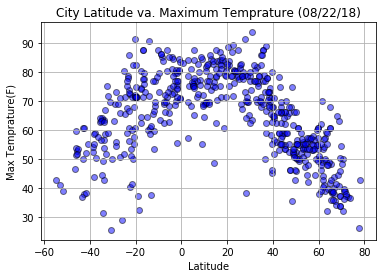

In [22]:
plt.scatter(lat, max_temp, marker="o", facecolors="blue", edgecolors="black", label="Temp", alpha=0.5)

plt.grid()

plt.title("City Latitude va. Maximum Temprature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature(F)")

plt.savefig("../Images/Lat_Temp.png")

plt.show()

#### Latitude vs. Humidity Plot

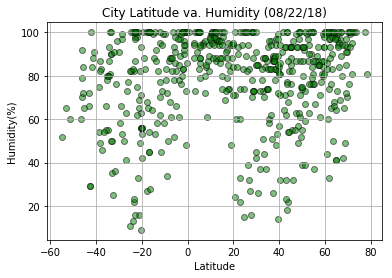

In [23]:
plt.scatter(lat, humidity, marker="o", facecolors="green", edgecolors="black", label="Humidity", alpha=0.5)

plt.grid()

plt.title("City Latitude va. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.savefig("../Images/Lat_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

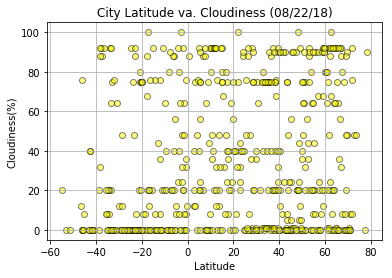

In [24]:
plt.scatter(lat, cloudiness, marker="o", facecolors="yellow", edgecolors="black", label="Cloudiness", alpha=0.5)

plt.grid()

plt.title("City Latitude va. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.savefig("../Images/Lat_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

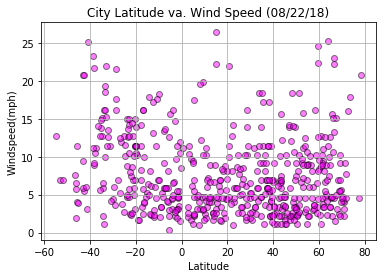

In [25]:
plt.scatter(lat, wind_speed, marker="o", facecolors="magenta", edgecolors="black", label="Windspeed", alpha=0.5)

plt.grid()

plt.title("City Latitude va. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed(mph)")

plt.savefig("../Images/Lat_Windspeed.png")

plt.show()